In [38]:
# Dashboard
# Use the Panel library to build an interactive dashboard for all of the visualizations. 

# Create a new dashboard.ipynb for your dashboard code. 
# Copy over the code for each visualization and place this into separate functions (1 function per visualization). 
# This will make it easier to build and modify the layout later. 
# Each function should return the plot figure in a format that Panel can use to plot the visualization.

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [40]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [41]:
# Import the CSVs
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

In [42]:
#housing unit per year function
def get_housing_units_per_year():
    housing_units_per_year = sfo_data.groupby('year')['housing_units'].mean().hvplot.bar(xlabel="Year", ylabel="Housing Units",ylim=(370000,385000), title="Housing Units Per Year")
    return housing_units_per_year

In [43]:
#gross rent function
def get_average_gross_rent():
    average_gross_rent = sfo_data.groupby('year')['gross_rent'].mean().hvplot.line(xlabel='Year', ylabel='Gross Rent', title='Average Gross Rent in SF')
    return average_gross_rent    

In [44]:
#sales price function
def get_average_sales_price():
    average_sales_price = sfo_data.groupby('year')['sale_price_sqr_foot'].mean().hvplot.line(xlabel='Year', ylabel='Average Sales Price', title='Average Sale Price Per Year')
    return average_sales_price

In [45]:
#...for average price by neighborhood 
multi_group = sfo_data.groupby(['year','neighborhood']).mean()

#average price by neighborhood function

def get_average_price_by_neighborhood():
    average_price_by_neighborhood = multi_group.hvplot.line(x='year', y='sale_price_sqr_foot', groupby='neighborhood')
    return average_price_by_neighborhood    

In [46]:
#...for top most expensive neighborhoods

multi_group_mean = multi_group.groupby(['neighborhood']).mean()
multi_group_mean_plot = multi_group_mean.sort_values('sale_price_sqr_foot', ascending=False).head(10)

#most expensive neighborhoods function

def get_top_most_expensive_neighborhoods():
    top_most_expensive_neighborhoods = multi_group_mean_plot.head(10).plot(kind='bar', y='sale_price_sqr_foot', title="Top 10 Most Expensive Neighborhoods.")
    return top_most_expensive_neighborhoods

In [47]:
#parallel coordinates function
def get_parallel_coordinates():
    parallel_coordinates = px.parallel_coordinates(multi_group_mean_plot, color='sale_price_sqr_foot', title="Parallel Coordinates Plot.")
    return parallel_coordinates

In [48]:
#parallel categories function
def get_parallel_categories():
    parallel_categories = px.parallel_categories(
    multi_group_mean_plot,
    dimensions=["sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "sale_price_sqr_foot": "Sale Price/sqft",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent",
    },
)

In [49]:

#mean values for each neighborhood
df_neighborhood_locations_mean = df_neighborhood_locations.groupby(['Neighborhood']).mean()

#combine two neighborhoods 
joined_df = pd.concat([multi_group_mean, df_neighborhood_locations_mean], axis='columns', join='inner')

#neighorhood function
def get_neighborhood_map():
    neighborhood_map = px.scatter_mapbox(joined_df, lat="Lat", lon="Lon", size="gross_rent", color="gross_rent")
    return neighborhood_map

In [50]:
#.../ The Panel

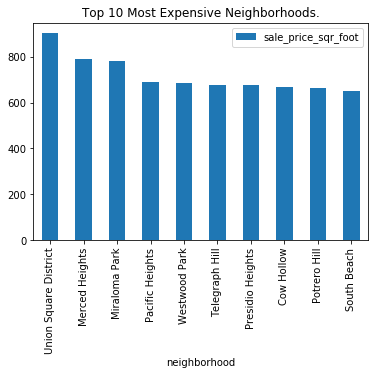

In [51]:
#Basic data column
basic_column = pn.Column(
    "##SF Housing Data", 
    get_housing_units_per_year(), 
    get_average_gross_rent(), 
    get_average_sales_price(),
)

#Neighborhood column
neigborhood_column = pn.Column(
    "##SF Neighborhood Data",
    get_average_price_by_neighborhood(), 
    get_top_most_expensive_neighborhoods(),
)

#Interactive column
interactive_column = pn.Column(
    "SF Interactive Data",
    get_parallel_coordinates(),
    get_parallel_categories()
)

#Map column
map_column = pn.Column(
    "SF Map",
    get_neighborhood_map(),
)

# Create tabs
dashboard = pn.Tabs(
    ("Housing Data", basic_column), ("Neighborhood Data", neigborhood_column), ("Interactive Data", interactive_column), ("SF Map", map_column)
)

In [53]:
# Here is the Dashboard 

In [54]:
dashboard.servable()

Tabs(active=3)
    [0] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] HoloViews(Curve)
        [3] HoloViews(Curve)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Central Richmond', width=250)
                [1] VSpacer()
        [2] Str(AxesSubplot)
    [2] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Str(None)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure)